# scikit-learn Notebook 1 of 2- Aaron Donnelly (G00299531)

***

## Overview

#### scikit-learn is a python library that contains many tools that can be used for predictive data analysis and machine learning[1]. scikit-learn was a project started by David Cournapeau during a Google Summer of Code project[2]. sci-kit learn contains many different algorithms that are very user friendly and require very little adjusting to me the used for an individuals specific needs. When it comes in machine learning there are two types of algroithms used. These are 'Supervised' and 'Unsupervised' algorithms. 

### Supervised Learning

#### Supervised alogorithms with regards to machine learning can be described as 'a learning approach thats defined by its use of labeled datasets'. These algorithms use these labelled datasets to 'train' otherwise known as 'supervise' the algorithm into making accurate predictions [3]. The two types of learning associated with supervised are Classification and Regression.

### Unsupervised Learning

#### Unsupervised algorithms are algorithms that do not used labeled datasets. Data that enters an unsupervised algorithm is completely unlabelled.  Due to the fact that the training data provided to an unsupervised model is unlabelled it is impossible to measure the model accuracy. Types on unsupervised algorithms are 'Clustering', 'Association' and 'Dimensionality reduction'[3].

#### In this notebook we will be looking at three different scikit-learn algorithms. These are Classification, Regression and Clustering.

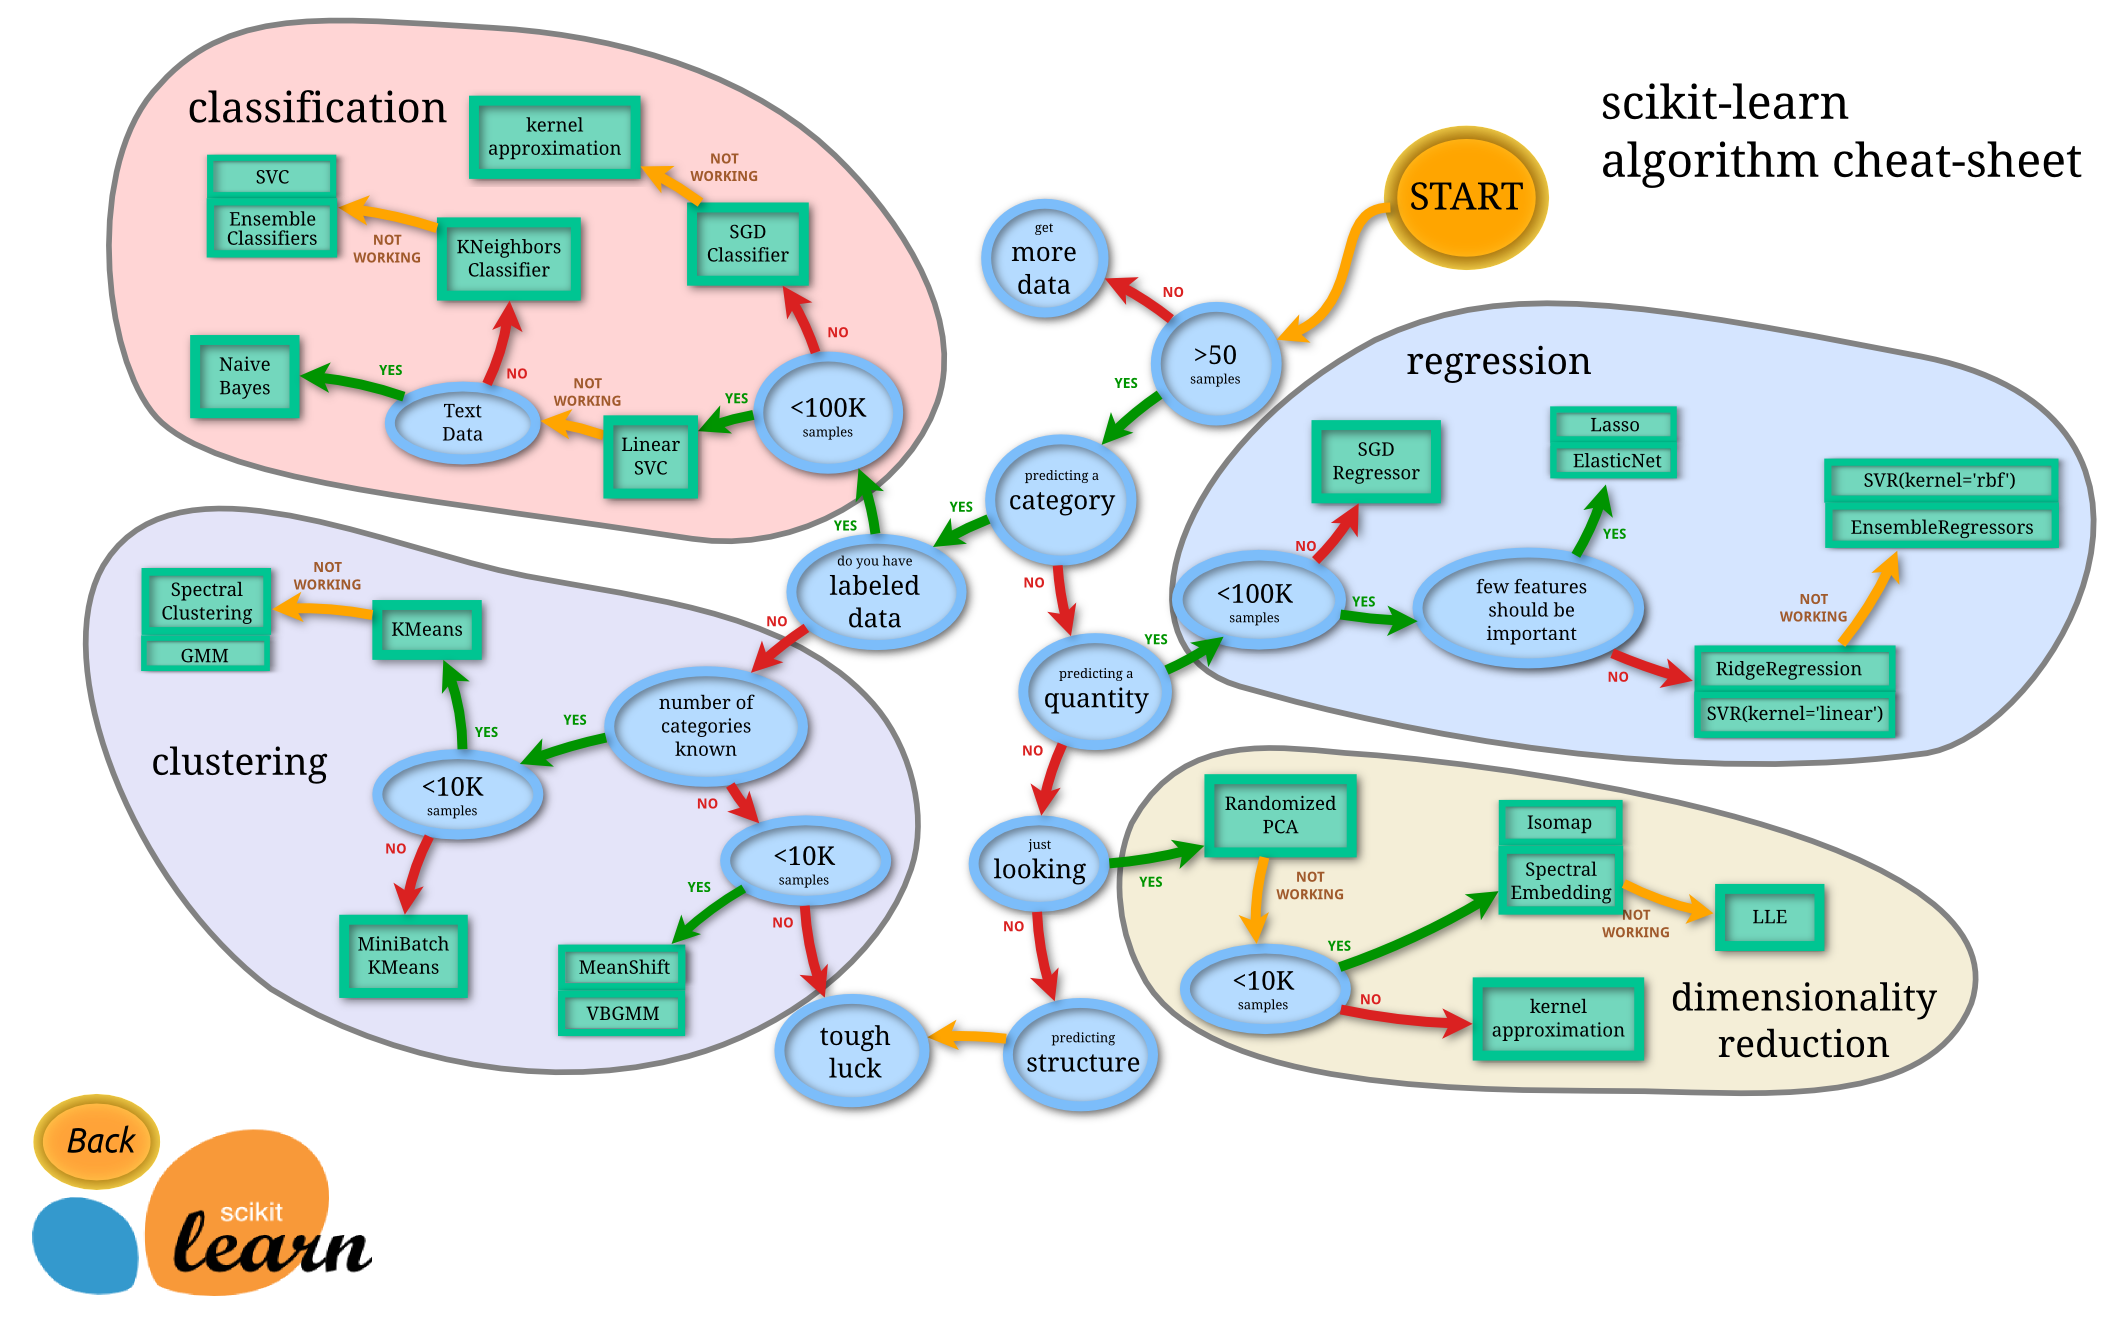
The above image was taken from: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### The image above is a useful graphic that is availible from the scikit learn website. This graphic is useful as it can recommend the most apporiate machine learning algorithm to use based on a number of factors associated with the dataset. The above is a series of decision trees that asks questions about the dataset to be analysed. The outcome from following the tree above is an algorithm provided by scikit learn that would be most appropriate for the style of dataset the analyst is working with.

## Classification

#### The first scikit-learn algorithm I will be looking at is classification. Classification is an example of supervised machine learning. Classification is used on a dataset that contains a 'class' and is used to predict a class based on the other features within the dataset. Binary classification is when there are only two possible classes and example of this would be whether a person has a certain type of desease based on blood markers and other medical tests. In this case the person either has the disease or does not have the disease. A multi class dataset another dataset on which classfication can be used. A multi-class dataset contains a number of classes greater then two and an example of this type of dataset is the one I will be demonstrating. The below dataset is a wine dataset and I will be hoping to predict the wines quality i.e its class, based on the composition of the wine. 

In [2]:
# Prepare the data. We start by importing pandas to read a dataframe [5]. The data I will be using for this demonstration is the wine dataset contained in sklearn.
import pandas as pd
# Numpy will be imported for later [6]
import numpy as np
import matplotlib.pyplot as plt
# We will import the dataset from the data folder in the repository [7]
df = pd.read_csv("data/winequality-white.csv", sep= ";")
df




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# Checking the size of the dataset to decide what algorithm to use.
len(df)

4898

In [4]:
# create a variable x for the features matrix.
x= df.drop("quality", axis= 1)
# create y which is going to be the label for this dataset.
y= df["quality"]


#### Now that the data is prepared an appropriate algorithm for the problem must be selected. I am going to be demonstrating a Classification machine learning algorithm so I will follow the map above and choose one of the recommended algorithms. Due to the fact that the dataset is an example of structured data I am going to use one of the ensemble algorithms namely Random Forest Classifier

In [5]:
# I will emport the RandomForestClassifier from the ensemble library[8].
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#### Now that we have selected an appropriate classification algorithm, we need to train and test the data from the dataset.

In [6]:
#In order to train and test, the data from the dataset will need to be split into training data and testing data. We do this by
# importing the train_test_split module from sklearn.model_selection.
from sklearn.model_selection import train_test_split

In [7]:
# We now divide the data into test and train data for both the features data and the label data. Setting the testsize to 0.2
# means that 80% of the data will be used to train the algorithm and the remaining data (20%) will be used to test the algorithm after training.
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size= 0.2)

In [8]:
# We now need to fit the training data. Semicolon removes warning message
clf.fit(x_train, y_train);

In [9]:
# Now a prediction can be made on the test data. This code uses the remaning test data to predict what the
# y label should be based on the features.
y_predict = clf.predict(x_test)
y_predict

array([6, 6, 6, 7, 6, 5, 6, 7, 6, 7, 6, 5, 6, 6, 5, 6, 5, 5, 7, 6, 5, 6,
       6, 6, 6, 6, 5, 7, 6, 5, 5, 7, 5, 5, 6, 6, 7, 6, 7, 6, 6, 7, 6, 7,
       6, 6, 8, 4, 5, 5, 7, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5,
       5, 5, 5, 6, 5, 5, 7, 5, 5, 5, 6, 7, 5, 5, 7, 7, 6, 6, 6, 5, 7, 6,
       6, 6, 5, 6, 6, 6, 6, 7, 5, 6, 7, 6, 5, 7, 7, 5, 6, 6, 6, 6, 5, 6,
       6, 5, 5, 6, 5, 5, 6, 7, 7, 6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 6,
       7, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 7, 7, 7, 5, 5, 6, 5, 6, 5, 5, 7,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 5, 5, 6, 7, 6, 5, 6, 7,
       5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 7, 6, 5, 6, 7, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5,
       6, 7, 6, 7, 5, 5, 6, 6, 7, 6, 5, 6, 5, 5, 6, 7, 5, 6, 6, 7, 6, 6,
       6, 5, 5, 6, 6, 5, 5, 5, 6, 7, 6, 6, 6, 4, 6, 4, 7, 7, 5, 6, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 7, 7, 5, 7, 5, 6, 5, 6, 8, 6,
       6, 7, 7, 6, 7, 5, 6, 7, 6, 6, 6, 5, 5, 5, 7,

In [10]:
# We can no determine just how good the algorithm is by evaluating the test results.
clf.score(x_train, y_train)

1.0

In [11]:
# The below shows that ~70% of the time the algorithm could predict the quality of the wine correctly based off the features.
clf.score(x_test, y_test)

0.6714285714285714

### Evalution metrics

#### It is important when using a model to evaluate it. 5 of these metrics that I will be looking at is Cross Validation, Accuracy, Area under ROC curve, Confusion matrix and classification report.

#### Cross Validation

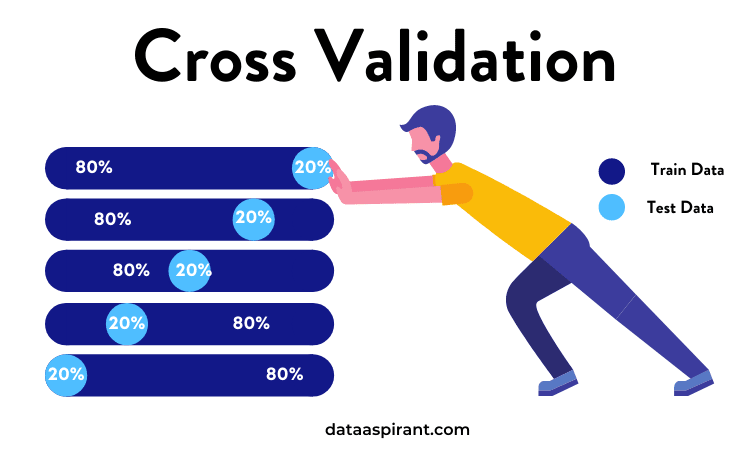
Image taken from: https://dataaspirant.com/cross-validation/

In [12]:
# Firstly I start by importing the cross_validation package from the sklearn.model_selection library.
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x, y, cv=5)

array([0.51530612, 0.5122449 , 0.55408163, 0.51991828, 0.53421859])

#### Cross valdation works by taking different sections of the dataset and using it as training and testing data. The cv parameter in the function sets the number of different divisions of the dataset. This will leave the user with, in this case 5 different scores as it uses 5 different train/test versions as opposed to only 1. As can be seen from the array above, when using the cross validation the model doesnt actually perform very well in comparison to the original score. The below cell shows a comparison of the two. There is a difference of 0.2.

In [13]:
clf_single_score = clf.score(x_test, y_test)
clf_cross_val_score= np.mean(cross_val_score(clf, x, y, cv=5))
clf_single_score, clf_cross_val_score

(0.6714285714285714, 0.5308319609764233)

#### Accuracy

#### The resulting score that the above function generates is the accuacy of the model. This means that the likelyhood of this model at predicting the correct quality of wine given the features is 51%.

#### Confusion Matrix

#### The confusion matrix will allow me to compare the class this model predicts and the class it was supposed to predict. This will give an idea as to where the model is getting 'confused'

In [14]:
# I start by importing the confusion_matrix module from sklearn.metrics
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[  0,   0,   3,   5,   0,   0],
       [  0,   6,  21,  12,   1,   0],
       [  0,   1, 207,  90,   5,   0],
       [  0,   0,  59, 337,  23,   0],
       [  0,   0,   4,  74,  96,   0],
       [  0,   0,   0,  15,   9,  12]], dtype=int64)

#### I can use sklearns ConfusionMatrixDisplay to make the above more visually appealing

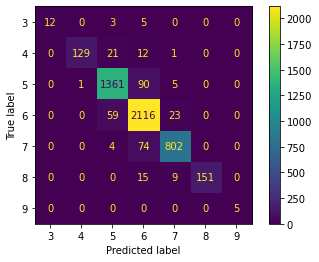

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator= clf, X= x, y=y)

#### The heatmap above shows coloured diagonal line. This line represents the number of times that the model predicted the class correctly.

### Classification report

#### I will now generate a classification report. Classification reports provide a series of metrics about this model. The classification_report module is, again imported from sklearn.metrics and prints out a table style report of a series of metrics. These metrics include precision, recall, f1-score and support.

In [20]:
# I start by importing the the classification_report from sklearn.metrics
from sklearn.metrics import classification_report
# I then run it on some data from my model
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.86      0.15      0.26        40
           5       0.70      0.68      0.69       303
           6       0.63      0.80      0.71       419
           7       0.72      0.55      0.62       174
           8       1.00      0.33      0.50        36

    accuracy                           0.67       980
   macro avg       0.65      0.42      0.46       980
weighted avg       0.69      0.67      0.66       980



C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Metric definitions
##### 'Precision is a metric that quantifies the number of correct positive predictions made.'
##### 'Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.'
##### 'F-Measure provides a way to combine both precision and recall into a single measure that captures both properties calculated as follows F-Measure = (2 * Precision * Recall) / (Precision + Recall)' [9]
##### Support is the number of occurences in the dataset

### Decision Trees

#### The random forest classifier works using a series of decision trees. Based on the answer to each decision tree the classifier then moves on to various other branches within the tree. In the most recent version of Scikit Learn It is possible to display these decision trees to give a visual idea of how the classifier works.

In [16]:
# The .esimators_ function will show each decision tree used by the algorithm in this dataset.
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=2102098760),
 DecisionTreeClassifier(max_features='auto', random_state=1713129158),
 DecisionTreeClassifier(max_features='auto', random_state=1531664920),
 DecisionTreeClassifier(max_features='auto', random_state=1109411748),
 DecisionTreeClassifier(max_features='auto', random_state=800997670),
 DecisionTreeClassifier(max_features='auto', random_state=785758750),
 DecisionTreeClassifier(max_features='auto', random_state=1850313365),
 DecisionTreeClassifier(max_features='auto', random_state=384563648),
 DecisionTreeClassifier(max_features='auto', random_state=1628617323),
 DecisionTreeClassifier(max_features='auto', random_state=1752995264),
 DecisionTreeClassifier(max_features='auto', random_state=1327875785),
 DecisionTreeClassifier(max_features='auto', random_state=804341321),
 DecisionTreeClassifier(max_features='auto', random_state=1273202781),
 DecisionTreeClassifier(max_features='auto', random_state=241902746),
 DecisionTr

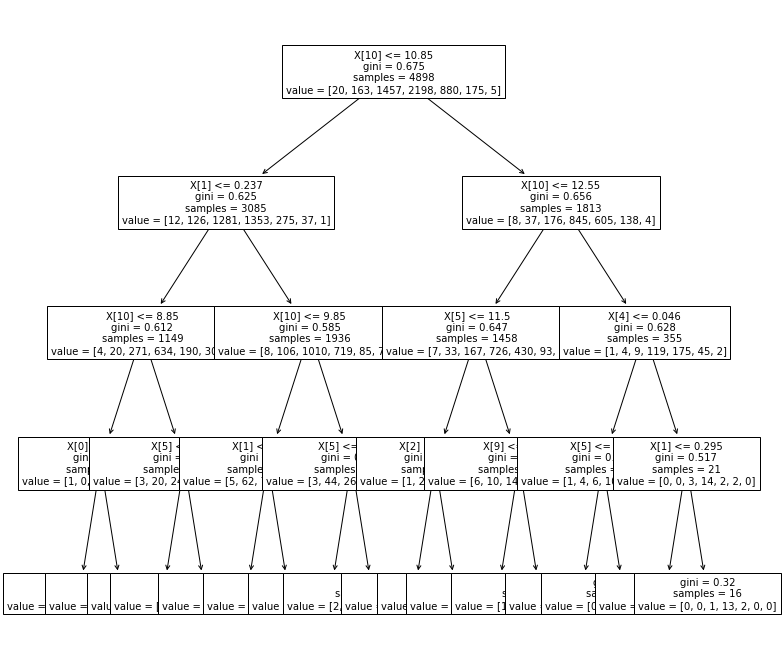

In [17]:
# I now import the tree module from sklearn.
from sklearn import tree

# I can now display a plot of the choosen tree to view it clearer
clf = tree.DecisionTreeClassifier(max_depth=4)  # set hyperparameter
clf.fit(x, y)
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

## Regression

#### The second type of algorithm from the scikit-learn library we will be looking at is Regression. Regression is also a type of supervised machine learning. The goal of a regression algorithm is to plot a best fit line to data in order to predict the value of the 'dependant variable for individuals for whom some information concerning the explanatory variable is available'[10] . Regression is often used in the business sector in order to carry out accurate forcasting and optimization. There are various types of Regression possible, but the one we will be looking at is Linear Regression.

In [115]:
#The data set I will be using for the algorithm is a housing dataset from Ames, Iowa [11].
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #[12]
housing = pd.read_csv("data/housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [116]:
# The next thing I am going to do is search for any missing values in the dataset
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [117]:
# I will now check the entire number of rows of the dataset to determine which method would be appropriate to deal with the 
# missing values
len(housing)

20640

In [118]:
# Seeing as 207 rows only represent 1% of the entire dataset I have decided to drops these rows entirely.
housing.dropna(subset= ["total_bedrooms"], inplace= True)

In [119]:
# I now run a count on the n/a's again to ensure all were removed.
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [120]:
# I now need to convert the ocean_proximity into a datatype that can be used by the machine learning algorithm.
# I will do this using the LabelEncoder from the sklearn.preprocessing library[13].
from sklearn.preprocessing import LabelEncoder


In [121]:
le = LabelEncoder()
label = le.fit_transform(housing["ocean_proximity"])
label

array([3, 3, 3, ..., 1, 1, 1])

In [122]:
# I will now drop the ocean_proximity column in order to replace it with the LabelEncoder column.
x1= housing.drop("ocean_proximity", axis= 1)
# I will now append the new column to the dataset and give it its original name
x1["ocean_proximity"]= label
# I will now rename this dataset x to keep it tidyier.
x= x1



In [123]:
# We now create the y dataset which in this case will be the SalePrice.
y= housing["median_house_value"]



In [124]:
# Again just like the classification algorithm the data will be split into test and train groups
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)

In [125]:
# We now need to fit the training data to the Regression model. The regression model I decided to use here is an 
# EnsembleReregessor algorithm known as RandomForestRegressor[14]
from sklearn.ensemble import RandomForestRegressor


In [126]:
#We can now train the model using the test data.

model= RandomForestRegressor()
model.fit(x_train,y_train);



### Evaluation


#### I will now evaluate this model using a series of metrics from the sklearn.metrics library (https://scikit-learn.org/stable/modules/model_evaluation.html)

#### The metrics I will be using to evaluate this model are
#### 1- R^2 or coefficient of determination
#### 2- Mean absolute error (MAE)
#### 3- Mean squared error (MSE)

#### The first metric I will use is the r2 (squared) metric.

In [127]:
# I will first create a prediction from my model.
y_preds = model.predict(x_test)

In [128]:
# I import the r2_score module from sklearn.metrics
from sklearn.metrics import r2_score

In [129]:
# I now run the r2_score and as can be seen the model predicts very well.
r2_score(y_test, y_preds)

0.9999995102782171

#### The second metric I will use is the Mean Absolute Error (MAE). MAE can be defined as the absolute difference between the predictions made by the model and the actual values.

In [130]:
# Again I start by importing the module from sklearn.metrics
from sklearn.metrics import mean_absolute_error

In [131]:
# Create some predictions
y_preds = model.predict(x_test)

In [132]:
# The resulting figure is the mean difference between the actual prediction made by the model and the test data.
MAE= mean_absolute_error(y_test, y_preds)
MAE

17.95698311720088

In [133]:
# I create a dataset to explain further. From the below table the actual values, the predicted values and the differences can be seen
df= pd.DataFrame(data= {"actual values":y_test, "predicted values": y_preds})
df["differences"]= df["predicted values"]- df["actual values"]
df.head(15)

,actual values,predicted values,differences
4514,136300,136303.0,3.0
15395,298100,298173.0,73.0
14082,331400,331363.0,-37.0
10776,272300,272255.0,-45.0
11801,93600,93598.0,-2.0
7751,161200,161201.0,1.0
6417,185600,185594.0,-6.0
3794,282300,282276.0,-24.0
18655,252400,252366.0,-34.0
3030,69800,69788.0,-12.0


#### The final evaluation metric I will be looking at is the Mean Squared Error (MSE). The mean squared error can be defined as the mean of the square of the errors between the actual values and the predicted values.

In [134]:
# Start by importing the MSE module from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [135]:
MSE= mean_squared_error(y_test, y_preds)
MSE

6687.918594592612

## Clustering

#### The next type of Machine learning algorithm I will be using will be Clustering. Clustering is one of the unsupervised machine learning algorithms and works by creating groups of data called k-clusters. The clustering algorithm I chose to use for this demonstration is the k-means algorithm. Clustering works by dividing groups of similar data-points from a dataset into groups known as clusters. An easy exampl of clustering would be how items are arranged in a supermarket or how people are arranged in a restaurants in cluster of familys or peers. Clustering is a common technique used in industry an example of companys that would use this technique would be Amazon in their recommended for you function or streaming services like Amazon Prime, Netflix, and Disney+. There are three main types of clustering. These are Exclusive Clustering, Overlapping Clustering and Hierarchical Clustering. An example of Hard Clustering is one I will look at below known as K-Means Clustering. This is used when a 'data point/item belongs exclusively to one cluster'[]. An Overlapping Cluster is also known as a Soft Cluster. This type of cluser is when a data point may exists in different cluster and thus leads to overlap among the cluster. A type of Overlapping Cluster is C-Means Clustering. Hierarchical Clustering is when sub clusters can exist in bigger clusters. The smallest of these subcluster are made up of similar data however some of these data point maybe similar to another cluster and thus linking the two clusters. Data points in that cluster may then be similar to data points that second cluster and thus they become linked and so on. See image below to better decribe hierarchical clustering.

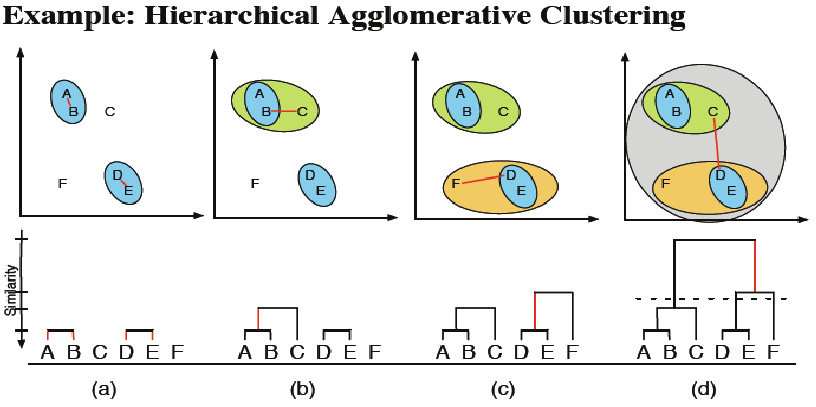
Image taken from https://www.google.ie/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FExample-of-hierarchical-clustering-clusters-are-consecutively-merged-with-the-most_fig3_273456906&psig=AOvVaw1FTsBknV3oy76LdqSeC7cO&ust=1637870023874000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCPD0mb_jsfQCFQAAAAAdAAAAABAD

### K-Means Clustering

#### The goal of K-Means Clustering is to group datapoints based on their similarities. The 'K' in K-Means Clustering represents the number of groups. The center point of a cluster is known as the centroid. The K-Means algorithm is used widely to solve classification problems.

In [20]:
# I start by importing the libraries i'll be using to demonsrate clustering.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
pd.set_option('display.max_rows', None)


In [21]:
# I'll now load the dataset.
df= pd.read_csv("data/penguins.csv")
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,11/09/2007,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,11/09/2007,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.


In [22]:
# I will remove a couple of columns so im only left with the physical characteristics of the samples.
p= df[["Culmen Length (mm)","Culmen Depth (mm)","Species","Flipper Length (mm)","Body Mass (g)"]]


In [23]:
# I will now shorting the length of the species names to make them more tidy in the upcoming plots. I'll do this using a dictonary
# and the pandas replace function.
pd.options.mode.chained_assignment = None
dict = {"Adelie Penguin (Pygoscelis adeliae)": "Adelie","Chinstrap penguin (Pygoscelis antarctica)": "Chinstrap",
           "Gentoo penguin (Pygoscelis papua)": "Gentoo"}
df=p.replace(to_replace= {"Species": dict})

In [24]:
df.isna().sum()

Culmen Length (mm)     2
Culmen Depth (mm)      2
Species                0
Flipper Length (mm)    2
Body Mass (g)          2
dtype: int64

In [25]:
# I will drop these values
df= df.dropna()

In [26]:
# Verify
df.isna().sum()

Culmen Length (mm)     0
Culmen Depth (mm)      0
Species                0
Flipper Length (mm)    0
Body Mass (g)          0
dtype: int64

In [27]:
# I will now create variables for the 4 features
cl= "Culmen Length (mm)"
cd = "Culmen Depth (mm)"
fl = "Flipper Length (mm)"
bm = "Body Mass (g)"

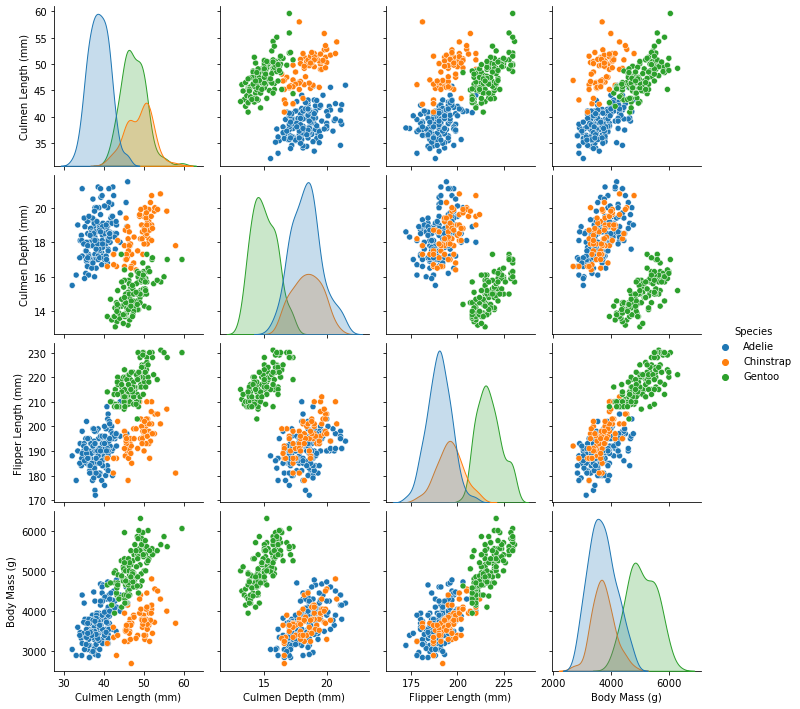

In [28]:
# I will now use the pairplot function to generate graphs that can be used to make observations about the data.
sns.pairplot(df, hue= "Species")
plt.show()

In [11]:
df[cl].count()

342

#### As can be seen by the above pair plot for all features. For 'Culmen Length' the Adelie species of penguin shows variation when compared to the other two species. For 'Culmen Depth' there is variation with the Gentoo species when compared to the other two species. For 'Flipper Length' there is also variation within the Gentoo species when compared to the other two species and the same is true for body mass. From the above plots it looks like the Gentoo species of penguin is the largest of the three species, with very little variation between the other two species. When you look at the clustering there are clear distinction between the Gentoo and other two species. The feature above that appears to show the greates variation among species is the Culmen Length and Flipper Length. These are the features I will be using. 

In [29]:
# I will now generate these clusters using the KMeans algorithm. I start by dropping all except the two features Ive selected
# above.
df= df.drop([bm, cd, "Species"], axis = 1)
df


,Culmen Length (mm),Flipper Length (mm)
0,39.1,181.0
1,39.5,186.0
2,40.3,195.0
4,36.7,193.0
5,39.3,190.0
6,38.9,181.0
7,39.2,195.0
8,34.1,193.0
9,42.0,190.0
10,37.8,186.0


In [30]:
# I will start by importing the required function from sklearn
from sklearn.cluster import KMeans

In [31]:
# I will use an n-clusters of three because I know there are three species.These are the number of clusters.
kmeans= KMeans(n_clusters= 3).fit(df)

In [33]:
# I can now display the centers of the generated clusters.
kmeans.cluster_centers_

array([[ 38.4275    , 186.99166667],
       [ 47.56744186, 216.88372093],
       [ 45.95483871, 196.7311828 ]])

In [34]:
df['Clusters']= kmeans.labels_
df['Clusters']

0      0
1      0
2      2
4      0
5      0
6      0
7      2
8      0
9      0
10     0
11     0
12     0
13     0
14     2
15     0
16     2
17     2
18     0
19     2
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     2
36     0
37     0
38     0
39     0
40     0
41     2
42     0
43     2
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     2
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     2
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     2
70     0
71     0
72     2
73     2
74     0
75     2
76     0
77     0
78     0
79     2
80     0
81     2
82     0
83     0
84     0
85     2
86     0
87     0
88     0
89     0
90     2
91     2
92     0
93     0
94     0
95     1
96     0
97     2
98     0
99     2
100    0
101    2
102    0
103    0
104    0
105    0
106    2
107    0
108    0
109    2
110    2
111    2
1

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>

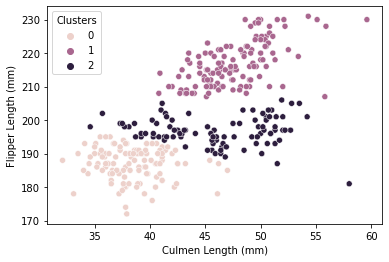

In [38]:
# I can now visualize the generated clusters
sns.scatterplot(x= "Culmen Length (mm)", y= "Flipper Length (mm)", hue= 'Clusters', data= df)

## Evaluation

#### Below I am going to use two methods of evaluating the model above. The first of these is known as the Elbow Plot. This will help be identify the ideal number of clusters that should be used in this dataframe. The second is a Silhoute Score. This will give me an idea as to 'how well samples are are clustered with other samples that are similar to each other'[15]. The code below is taking from 'https://www.youtube.com/watch?v=zQfEc7vA1gU'[16].

In [42]:
# In order to generate the elbow plot I am going to run the cluster analysis 12 times.
# I start by creating a range between 1 and 12 and then create an empty array into which I will place the results
K= range(1,12)
wss= []
for k in K:
    kmeans= KMeans(n_clusters= k, init= "k-means++")
    kmeans= kmeans.fit(df)
    wss_iter= kmeans.inertia_
    wss.append(wss_iter)
    print(wss)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


[77801.61488304092]
[77801.61488304092, 21557.891422192293]
[77801.61488304092, 21557.891422192293, 14083.359878907226]
[77801.61488304092, 21557.891422192293, 14083.359878907226, 9854.982087958964]
[77801.61488304092, 21557.891422192293, 14083.359878907226, 9854.982087958964, 7667.226911919822]
[77801.61488304092, 21557.891422192293, 14083.359878907226, 9854.982087958964, 7667.226911919822, 6555.76318667803]
[77801.61488304092, 21557.891422192293, 14083.359878907226, 9854.982087958964, 7667.226911919822, 6555.76318667803, 5397.298631977125]
[77801.61488304092, 21557.891422192293, 14083.359878907226, 9854.982087958964, 7667.226911919822, 6555.76318667803, 5397.298631977125, 4449.80923185119]
[77801.61488304092, 21557.891422192293, 14083.359878907226, 9854.982087958964, 7667.226911919822, 6555.76318667803, 5397.298631977125, 4449.80923185119, 4031.89567160988]
[77801.61488304092, 21557.891422192293, 14083.359878907226, 9854.982087958964, 7667.226911919822, 6555.76318667803, 5397.2986319

In [43]:
# I now create a dataframe to store the number of clusters with their WSS score
mycenters= pd.DataFrame({"Clusters":K, "WSS":wss})
mycenters

,Clusters,WSS
0,1,77801.614883
1,2,21557.891422
2,3,14083.359879
3,4,9854.982088
4,5,7667.226912
5,6,6555.763187
6,7,5397.298632
7,8,4449.809232
8,9,4031.895672
9,10,3538.095786


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

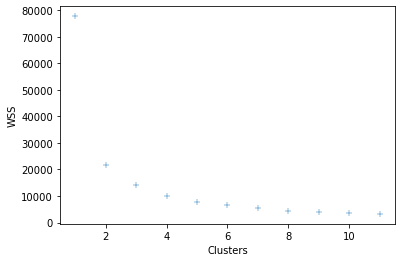

In [44]:
# I then plot the elbow plot
sns.scatterplot(x= "Clusters", y = "WSS", data = mycenters, marker= "+")

#### Using the elbow plot above I can conclude that 3 clusters is the appropriate number to use as this is the location in the plot where the actual bend it.

##### Below I am going to use the silhouette method to determine the optimum number of clusters.

In [54]:
# I will start by importing the metrics module of sklearn
import sklearn.metrics as metrics
# I will then create a for loop and print the results of the silhouette metric.
for i in range (3, 13):
    labels= KMeans(n_clusters= i, init= "k-means++", random_state=200).fit(df).labels_
    print("Silhouette score for k(clusters)= "+str(i)+ " is " +str(metrics.silhouette_score(df, labels,
    metric= "euclidean", sample_size = 1000, random_state= 200)))


Silhouette score for k(clusters)= 3 is 0.48998117923510903
Silhouette score for k(clusters)= 4 is 0.45285692903568686
Silhouette score for k(clusters)= 5 is 0.42692491499885765
Silhouette score for k(clusters)= 6 is 0.41752825520259396
Silhouette score for k(clusters)= 7 is 0.4334832686453681
Silhouette score for k(clusters)= 8 is 0.4109076105941816
Silhouette score for k(clusters)= 9 is 0.3978949699426214
Silhouette score for k(clusters)= 10 is 0.38643378356955355
Silhouette score for k(clusters)= 11 is 0.38569619289952356
Silhouette score for k(clusters)= 12 is 0.38351529210730395


## Conclusion

#### The Scikit-learn python package proves to be a very useful tool for the area of Machine Learning. It allows for the user to begin using machine learning without needing to understand the intrinsic mechanisms of the algorithms used. This makes machine learning much more accessible to a wider audience who may not have had much prior knowledge in programming.

## References

#### 1-	Learn. scikit. Available at: https://scikit-learn.org/stable/ [Accessed November 19, 2021].
#### 2-	Google Cloud Tech, 2018. YouTube. Available at: https://www.youtube.com/watch?v=rvVkVsG49uU [Accessed November 19, 2021].
#### 3-	Delua, Julianna. “Supervised vs. Unsupervised Learning: What’s the Difference?” Www.ibm.com, 12 Mar. 2021, www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning [Accessed November 20, 2021].
#### 4-	archive.ics.uci.edu. (n.d.). Index of /ml/machine-learning-databases/wine-quality. [online] Available at: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ [Accessed 20 Nov. 2021].
#### 5-	Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/.
#### 6-	Numpy.org. (2009). NumPy — NumPy. [online] Available at: https://numpy.org/.
#### 7-	Brownlee, J. (2016). 10 Standard Datasets for Practicing Applied Machine Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/standard-machine-learning-datasets/ [Accessed November 24, 2021]. 
#### 8-	Scikit-learn (2018). 3.2.4.3.1. sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html [Accessed November 24, 2021].
#### 9-	Brownlee, J. (2020). How to Calculate Precision, Recall, and F-Measure for Imbalanced Classification. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/ [Accessed 25 Nov. 2021].
#### 10-	www.kellogg.northwestern.edu. (n.d.). Regression Analysis: An Overview. [online] Available at: https://www.kellogg.northwestern.edu/faculty/weber/jhu/statistics/regression.htm [Accessed 25 Nov. 2021].
#### 11-	Vanschoren, J. (2019). OpenML. [online] OpenML: exploring machine learning better, together. Available at: https://www.openml.org/d/42165 [Accessed 4 Dec. 2021].
#### 12-	Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/ [Accessed 4 Dec. 2021].
#### 13-	Scikit-learn.org. (2019). 5.3. Preprocessing data — scikit-learn 0.21.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/preprocessing.html [Accessed 10 Dec. 2021].
#### 14-	Scikit-learn.org. (2018). 3.2.4.3.2. sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html [Accessed 10 Dec. 2021].
#### 15-	Kumar, A. (2020). KMeans Silhouette Score With Python Examples - DZone AI. [online] dzone.com. Available at: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=Silhouette%20score%20is%20used%20to [Accessed 28 Dec. 2021].
#### 16-	Naik, K. (2020). k-means Elbow Method and Silhouette Method. [online] www.youtube.com. Available at: https://www.youtube.com/watch?v=zQfEc7vA1gU [Accessed 28 Dec. 2021].